In [1]:
import numpy as np

# Step 1: Load the labels (first column) and features (remaining columns) separately
# Load the labels (class names) as strings (usecols=0)
Y_labels = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                         delimiter=',', dtype=str, encoding=None, usecols=0, skip_header=5)

# Load the feature columns (usecols 5, 6, 7, 8, 9 for vedge-mean, vedge-sd, hedge-mean, hedge-sd, intensity-mean)
X = np.genfromtxt('/home/darksst/Desktop/Fall24/StatisticalDecisionTheory/Data/Image/segmentation.data', 
                  delimiter=',', dtype=float, encoding=None, usecols=(5, 6, 7, 8, 9), skip_header=5)

# Step 2: One-hot encode the class labels
unique_classes = np.unique(Y_labels)  # Get the unique class names
num_classes = len(unique_classes)

# Create a one-hot encoded matrix for the labels
Y = np.zeros((Y_labels.shape[0], num_classes))
for i, label in enumerate(Y_labels):
    Y[i, np.where(unique_classes == label)[0][0]] = 1

# Initialize the parameter matrix B with zeros
B = np.zeros((X.shape[1], Y.shape[1]))

# Print shapes to verify everything is correct
print(f"Feature matrix (X) shape: {X.shape}")
print(f"One-hot encoded labels (Y) shape: {Y.shape}")
print(f"Parameter matrix (B) shape: {B.shape}")


Feature matrix (X) shape: (210, 5)
One-hot encoded labels (Y) shape: (210, 7)
Parameter matrix (B) shape: (5, 7)


Final parameters after training: Parameter containing:
tensor([[ 0.0281, -0.0952,  0.0137,  0.1662, -0.3920],
        [ 0.1252,  0.0334,  0.1899, -0.1473, -0.0165],
        [-0.0134, -0.2591,  0.3697,  0.0199, -0.0665],
        [-0.1591,  0.0973, -0.1845,  0.0171, -0.1005],
        [ 0.1657,  0.1791,  0.0667, -0.2499,  0.0078],
        [-0.0959,  0.0598, -0.4580,  0.0288, -0.1324],
        [ 0.3226, -0.0350,  0.2024, -0.2399,  0.0010]], requires_grad=True) Parameter containing:
tensor([ 0.1743, -0.3387, -0.3015,  0.0958,  0.2244,  0.1670, -0.1652],
       requires_grad=True)
Final Loss: 1.9319833517074585


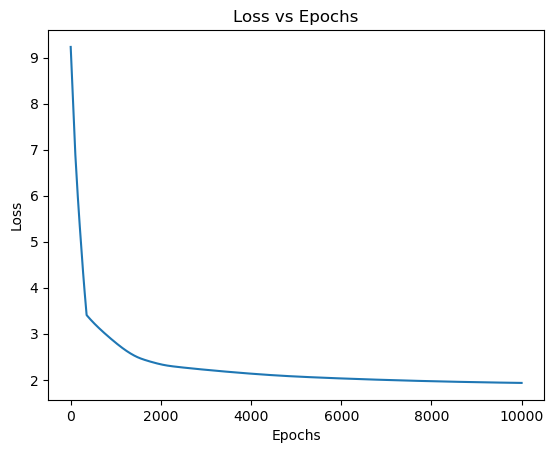

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convert the NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)  # Feature matrix
Y_tensor = torch.tensor(Y, dtype=torch.float32)  # One-hot encoded labels

# Define the Logistic Regression model using PyTorch
class LogisticRegression(nn.Module):
    def __init__(self, dimension_input, dimension_output):
        super(LogisticRegression, self).__init__()
        # Define a single linear layer (this will be W*X + b)
        self.linear = nn.Linear(dimension_input, dimension_output)
    
    def forward(self, x):
        # Forward pass (logits)
        return self.linear(x)

# Set the input and output dimensions
dimension_input = X_tensor.shape[1]   # Number of features
dimension_output = Y_tensor.shape[1]  # Number of classes (one-hot encoding)

# Initialize the model
model = LogisticRegression(dimension_input, dimension_output)

# Define the loss function (CrossEntropyLoss handles softmax + loss internally)
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0001)

# Number of epochs
epochs = 10000

# Initialize a list to store the loss values for plotting
loss_values = []

# Training loop
for epoch in range(epochs):
    # Forward pass: compute logits
    logits = model(X_tensor)

    # Compute the loss (CrossEntropyLoss expects raw logits, no need for softmax)
    loss = criterion(logits, torch.max(Y_tensor, 1)[1])  # Convert Y_tensor from one-hot to class labels

    # Zero the gradients from the previous step
    optimizer.zero_grad()

    # Backward pass: compute gradients
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Store the loss value for plotting
    loss_values.append(loss.item())

# Print the final model parameters
print("Final parameters after training:", model.linear.weight, model.linear.bias)
print("Final Loss:", loss_values[-1])

# Plot the loss over epochs using Matplotlib
plt.plot(range(epochs), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()